## 34207147 Jee Eun Kim

## 1. Document Clustering
<b>Question 1 [Expectation Maximisation, 8+4+2+10+8+8=40 Marks]

I. Please briefly answer the following high-level questions:

<b>– Write mathematical formulations of the optimization functions of maximum likelihood estimation (MLE) for the document clustering model with complete data and incomplete data, respectively. Then briefly describe why MLE with incomplete data is hard to optimize.

<b>– Briefly explain the high-level idea of the EM algorithm to find MLE parameter estimates.

### **Complete Data MLE Optimization Process**

**1. Likelihood Function**

The likelihood function L($\varphi_k$, $\mu_{k,w}$) considers the probability that each document belongs to a certain cluster and the probability of words appearing within that cluster.

$$
L(\varphi_k, \mu_{k,w}) = \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)} \right)^{z_{nk}}
$$

**2. Log-Likelihood**

Taking the log of the likelihood simplifies the equation, turning products into sums.

$$
\log L(\varphi_k, \mu_{k,w}) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \log \varphi_k + \sum_{w \in A} c(w, d_n) \log \mu_{k,w} \right)
$$

**3. Constraints**

When optimizing, we must satisfy the following probability constraints:

1. **Constraint on $ \varphi_k $:**

$$
\sum_{k=1}^{K} \varphi_k = 1
$$

2. **Constraint on $ \mu_{k,w} $:**

$$
\sum_{w \in A} \mu_{k,w} = 1 
$$

**4. Lagrangian**

The Lagrangian function incorporates these constraints into the optimization process.

$$
\mathcal{L}(\varphi_k, \mu_{k,w}, \lambda_1, \lambda_{k,2}) = \log L(\varphi_k, \mu_{k,w}) - \lambda_1 \left( \sum_{k=1}^{K} \varphi_k - 1 \right) - \sum_{k=1}^{K} \lambda_{k,2} \left( \sum_{w \in A} \mu_{k,w} - 1 \right)
$$

**5. Differentiating for Optimization**

- **Step 1:** Differentiate the Lagrangian with respect to $ \varphi_k $ and set it to zero.

  $$
  \frac{\partial \mathcal{L}}{\partial \varphi_k} = \sum_{n=1}^{N} \frac{z_{nk}}{\varphi_k} - \lambda_1 = 0
  $$

- **Step 2:** Differentiate the Lagrangian with respect to $\mu_{k,w} $ and set it to zero.

  $$
  \frac{\partial \mathcal{L}}{\partial \mu_{k,w}} = \sum_{n=1}^{N} z_{nk} \frac{c(w, d_n)}{\mu_{k,w}} - \lambda_{k,2} = 0
  $$

**6. Solving for Optimal Values**

- **Optimal solution for $ \varphi_k $:**

  $$
  \varphi_k = \frac{\sum_{n=1}^{N} z_{nk}}{\lambda_1}
  $$

  This represents the proportion of data points assigned to cluster \( k \).

- **Optimal solution for $ \mu_{k,w} $:**

  $$
  \mu_{k,w} = \frac{\sum_{n=1}^{N} z_{nk} c(w, d_n)}{\lambda_{k,2}}
  $$

  This represents the proportion of occurrences of word \( w \) in cluster \( k \).

**7. Maximum Likelihood Estimates (MLE)**

Using the optimal values above, we can derive the MLE for each parameter.

- **MLE for $ \varphi_k $:**

  $$
  \varphi_k = \frac{\sum_{n=1}^{N} z_{nk}}{N}
  $$

  This is the proportion of documents assigned to cluster \( k \) among all documents.

- **MLE for $ \mu_{k,w} $:**

  $$
  \mu_{k,w} = \frac{\sum_{n=1}^{N} z_{nk} c(w, d_n)}{\sum_{n=1}^{N} z_{nk} \sum_{w \in A} c(w, d_n)}
  $$

  This is the proportion of word \( w \) occurrences within cluster \( k \), relative to the total word occurrences in that cluster.


By following this process, we can estimate the prior probability of each cluster and the word distributions within clusters using MLE in the case of complete data.

---

### **Incomplete Data MLE Optimization Process**

**1. Likelihood Function**

$$
p(d_1, \ldots, d_N) = \prod_{n=1}^{N} p(d_n) = \prod_{n=1}^{N} \sum_{k=1}^{K} \left( \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)} \right)
$$

**2. Log-Likelihood**

$$
\log p(d_1, \ldots, d_N) = \sum_{n=1}^{N} \log \left( \sum_{k=1}^{K} \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)} \right)
$$

**Why optimization is difficult:**  
Since we don't know which cluster each document $d_N$  belongs to, we have to calculate the probability of the document belonging to every possible cluster and sum them up. In other words, because we don't know which cluster each document belongs to, we need to consider all possibilities. This is why we see a summation in the likelihood function:

$$
\sum_{k=1}^{K} \left( \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w, d_n)} \right)
$$

This equation sums over the probability of document $d_N$  belonging to every cluster $ k$.

When we try to simplify the calculations using the log-likelihood function, the summation inside the logarithm makes it difficult to differentiate, thus making it hard to optimize with respect to each parameter $ \varphi_k, \mu_{k,w}$.


Because we do not know which cluster a document belongs to, it is difficult to directly compute **Maximum Likelihood Estimation (MLE)**. To solve this problem, we use the **EM Algorithm**.

---

### High-Level Idea of the EM Algorithm for MLE Parameter Estimation
The Expectation-Maximization (EM) algorithm is an iterative method used to find the Maximum Likelihood Estimates (MLE) in cases where data is incomplete or contains latent variables. The key challenge in such cases is that the missing or latent data prevents direct optimization of the likelihood function. EM solves this by alternating between two steps:

**E-Step (Expectation Step):**
In this step, the algorithm uses the current estimates of the parameters to compute the expected values of the hidden or latent variables. These expectations represent the probability (responsibility) that each data point belongs to each cluster, based on the current parameter values.

**M-Step (Maximization Step):**
In this step, the parameters are updated to maximize the likelihood of the data, using the responsibilities calculated in the E-step. The algorithm re-estimates the parameters to maximize the expected complete log-likelihood, treating the hidden data as if it were known.

**Iteration and Convergence:**
The E-step and M-step are repeated iteratively until the parameter estimates converge to stable values. This approach allows the EM algorithm to handle missing or incomplete data, gradually refining the parameter estimates to find the MLE, even when direct optimization is difficult.

### II. Derive Expectation and Maximization steps of the (soft)-EM algorithm for Document Clus- tering, in a markdown cell (ideally using Latex for clean typesetting and show your work in your submitted PDF report.) In particular, include all model parameters that should be learnt and the exact expression (using the same math convention that we saw in the Module 4) that should be used to update these parameters during the learning process (ie., E-step, M-step and assignments).


### E-step (Assigning documents to clusters)

Using the current estimates of the parameters $ \varphi_k, \mu_{k,w} $, we calculate the probability that each document belongs to a cluster. This probability is called the **responsibility**.

According to Bayes' Theorem:

$$
\text{Posterior probability} = \frac{\text{Likelihood} \times \text{Prior probability}}{\text{Evidence}}
$$

Thus, the responsibility $\gamma(z_{n,k})$ is computed as follows:

$$
\gamma(z_{n,k}) = p(z_{n,k} = 1 \mid d_n, \theta^{\text{old}}) = \frac{\varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)}}{\sum_{k'=1}^{K} \varphi_{k'} \prod_{w \in A} \mu_{k',w}^{c(w,d_n)}}
$$

### M-step (Updating the parameters)

Based on the responsibilities computed in the E-step, we **recalculate** the parameters for each cluster. This step involves finding new parameters that maximize the **log-likelihood function**.

The log-likelihood function $Q(\theta, \theta^{\text{old}})$ is given by:

$$
Q(\theta, \theta^{\text{old}}) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) \left( \ln \varphi_{k} + \sum_{w \in A} c(w, d_n) \ln \mu_{k,w} \right)
$$

### Parameter Updates

1. **Updating word occurrence probabilities $\mu_{k,w}$:**

$$
\mu_{k,w} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w', d_n)}
$$

2. **Updating cluster priors $\varphi_k$:**

$$
\varphi_k = \frac{N_k}{N}, \quad N_k = \sum_{n=1}^{N} \gamma(z_{n,k})
$$

### Optimized Log-Likelihood Function

The optimization problem is expressed as:

$$
\theta^{\text{new}} = \underset{\theta}{\text{argmax}} \ln p(X, Z^* \mid \theta)
$$

### Iteration

These two steps (E-step and M-step) are repeated until the parameters converge and no longer change, thus finding the optimal values.


### III. Load Task2A.txt file (if needed, perform text preprocessing similar to what we did in Activity 4.2).

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Path
file_path = '/Users/jeeeunkim/Desktop/[FIT5201]ML/ass2/Ass2 dataset/Task2A.txt'

# Read file
with open(file_path, 'r') as file:
    text = file.readlines()

# Separate labels and articles
all([length == 2 for length in [len(line.split('\t')) for line in text]])  # Check if each line has 2 elements
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]

# Create DataFrame
docs = pd.DataFrame(data=zip(labels, articles), columns=['label', 'article'])
docs['label'] = docs['label'].astype('category')
print(docs.head())  # Check data

# Use CountVectorizer (remove stop words and set minimum frequency)
cv = CountVectorizer(lowercase=True, stop_words='english', min_df=5)
X = cv.fit_transform(articles).toarray()  # Transform documents into feature vectors

# Check the shape of the feature matrix
print("Feature matrix shape:", X.shape)  # (number of documents, number of words)

# Print top 10 features
print("Top 10 features:", cv.get_feature_names_out()[:10])


       label                                            article
0  sci.crypt  ripem frequently asked questions archive name ...
1  sci.crypt  ripem frequently asked questions archive name ...
2  sci.crypt  ripem frequently noted vulnerabilities archive...
3  sci.crypt  certifying authority question answered if you ...
4  sci.crypt  rubber hose cryptanalysis some sick part of me...
Feature matrix shape: (2373, 8094)
Top 10 features: ['aa' 'aaron' 'ab' 'abandoned' 'abbreviation' 'abc' 'abdominal' 'abiding'
 'ability' 'able']


### IV. Implement the EM algorithm (derived in Chapter 5 of Module 4). Please provide enough comments in your submitted code.

In [28]:
# Log-sum-exp trick function
def log_sum_exp(x):
    c = np.max(x, axis=1, keepdims=True)  
    return c + np.log(np.sum(np.exp(x - c), axis=1, keepdims=True)) 

# SoftEM 
class SoftEM:
    def __init__(self, K, tau_max=50, epsilon=0.01, random_state=None):
        self.K = K  # Number of clusters
        self.tau_max = tau_max  # Maximum number of iterations
        self.epsilon = epsilon  # Convergence threshold
        self.random_state = random_state
        np.random.seed(self.random_state)
           
    def fit(self, X, verbose=False):
        N, D = X.shape
        # Initialize parameters : priors, means, covariances
        self.Psi_hat_ = np.array([1/self.K] * self.K)  # Cluster priors
        self.Mu_hat_ = X[np.random.choice(N, size=self.K, replace=False)]  # Random cluster means
        self.Sigma_hat_ = np.array([np.eye(D) for _ in range(self.K)])  # Identity covariance matrices
        r = np.zeros((N, self.K))
        Mu_hat_old = self.Mu_hat_
        
        # EM loop until convergence 
        terminate = False
        tau = 0
        while not terminate:
            # E-step: Calculate posterior probabilities
            log_r = np.zeros((N, self.K))
            for k in range(self.K):
                log_r[:, k] = np.log(self.Psi_hat_[k]) + multivariate_normal.logpdf(
                    X, mean=self.Mu_hat_[k], cov=self.Sigma_hat_[k], allow_singular=True)
            log_r -= log_sum_exp(log_r)  # Apply log-sum-exp trick
            r = np.exp(log_r)
            r /= r.sum(axis=1, keepdims=True)  # Normalize probabilities

            # M-step: Update parameters
            Nk_hat = r.sum(axis=0)
            self.Psi_hat_ = Nk_hat / N  # Update cluster priors
            self.Mu_hat_ = (r.T @ X) / Nk_hat.reshape((-1, 1))  # Update means
            for k in range(self.K):
                r_k = r[:, k, None]
                # Update covariance matrices with a small regularization term
                self.Sigma_hat_[k] = (r_k * (X - self.Mu_hat_[k])).T @ (X - self.Mu_hat_[k]) / Nk_hat[k]
                self.Sigma_hat_[k] += np.eye(D) * 1e-6

            # Check for convergence
            tau += 1
            terminate = (tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol=self.epsilon)
            Mu_hat_old = self.Mu_hat_

        if verbose:
            print(f'Converged in {tau} iterations')
        return self

    def predict_proba(self, X):
        N = X.shape[0]
        log_r = np.zeros((N, self.K))
        for k in range(self.K):
            log_r[:, k] = np.log(self.Psi_hat_[k]) + multivariate_normal.logpdf(
                X, mean=self.Mu_hat_[k], cov=self.Sigma_hat_[k], allow_singular=True)
        log_r -= log_sum_exp(log_r)  # Apply log-sum-exp trick
        r = np.exp(log_r)
        return r / r.sum(axis=1, keepdims=True)  # Normalize probabilities

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)  # Return the most likely cluster for each data point

# HardEM
class HardEM:
    def __init__(self, K, tau_max=50, epsilon=0.01, random_state=None):
        self.K = K  # Number of clusters
        self.tau_max = tau_max  # Maximum number of iterations
        self.epsilon = epsilon  # Convergence threshold
        self.random_state = random_state
        np.random.seed(self.random_state)
        
    def fit(self, X, verbose=False):
        N, D = X.shape
        # Initialize parameters : priors, means, covariances
        self.Psi_hat_ = np.array([1/self.K] * self.K)  # Cluster priors
        self.Mu_hat_ = X[np.random.choice(N, size=self.K, replace=False)]  # Random cluster means
        self.Sigma_hat_ = np.array([np.eye(D) for _ in range(self.K)])  # Identity covariance matrices
        r = np.zeros((N, self.K))
        Mu_hat_old = self.Mu_hat_
        
        # EM loop until convergence
        terminate = False
        tau = 0
        while not terminate:
            # E-step: Calculate posterior probabilities
            log_r = np.zeros((N, self.K))
            for k in range(self.K):
                log_r[:, k] = np.log(self.Psi_hat_[k]) + multivariate_normal.logpdf(
                    X, mean=self.Mu_hat_[k], cov=self.Sigma_hat_[k], allow_singular=True)
            
            # Hard assignment: assign each data point to the cluster with the highest probability
            r = np.zeros((N, self.K))
            hard_assignments = np.argmax(log_r, axis=1)
            r[np.arange(N), hard_assignments] = 1

            # M-step: Update parameters
            Nk_hat = r.sum(axis=0)
            self.Psi_hat_ = Nk_hat / N  # Update cluster priors
            self.Mu_hat_ = (r.T @ X) / Nk_hat.reshape((-1, 1))  # Update means
            for k in range(self.K):
                r_k = r[:, k, None]
                # Update covariance matrices with a small regularization term
                self.Sigma_hat_[k] = (r_k * (X - self.Mu_hat_[k])).T @ (X - self.Mu_hat_[k]) / Nk_hat[k]
                self.Sigma_hat_[k] += np.eye(D) * 1e-6

            # Check for convergence
            tau += 1
            terminate = (tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol=self.epsilon)
            Mu_hat_old = self.Mu_hat_

        if verbose:
            print(f'Converged in {tau} iterations')
        return self

    def predict(self, X):
        N = X.shape[0]
        log_r = np.zeros((N, self.K))
        for k in range(self.K):
            log_r[:, k] = np.log(self.Psi_hat_[k]) + multivariate_normal.logpdf(
                X, mean=self.Mu_hat_[k], cov=self.Sigma_hat_[k], allow_singular=True)
        
        return np.argmax(log_r, axis=1)  # Return the most likely cluster for each data point


### V. Set the number of clusters K=4, and run the hard clustering (using hard-EM) and soft clustering (using soft-EM) on the provided data.

In [16]:
# Set the number of clusters
K = 4

# Initialize the HardEM and SoftEM models
hard_em = HardEM(K=K, tau_max=50, epsilon=0.01, random_state=42)
soft_em = SoftEM(K=K, tau_max=50, epsilon=0.01, random_state=42)

# Fit both models to the data
hard_em.fit(X, verbose=True)
soft_em.fit(X, verbose=True)

# Predict clusters using hard and soft clustering
hard_clusters = hard_em.predict(X)
soft_clusters = soft_em.predict(X)

# For soft clustering, also obtain probabilities for each cluster
soft_probabilities = soft_em.predict_proba(X)

# Display the clustering results
print("Hard Clustering Assignments:", hard_clusters)
print("Soft Clustering Assignments (Most Likely):", soft_clusters)
print("Soft Clustering Probabilities:\n", soft_probabilities)


Converged in 2 iterations
Converged in 3 iterations
Hard Clustering Assignments: [3 2 3 ... 3 3 3]
Soft Clustering Assignments (Most Likely): [1 1 2 ... 2 2 2]
Soft Clustering Probabilities:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


### VI. Perform a PCA on the clusterings that you get based on the Mixture Models in the same way we did in Activity 4.2. Then, plot the obtained clusters with different colors where x and y axes are the first two principal components (similar to Activity 4.2). Based on your plots, discuss how and why the hard and soft clustering are different in a markdown cell.

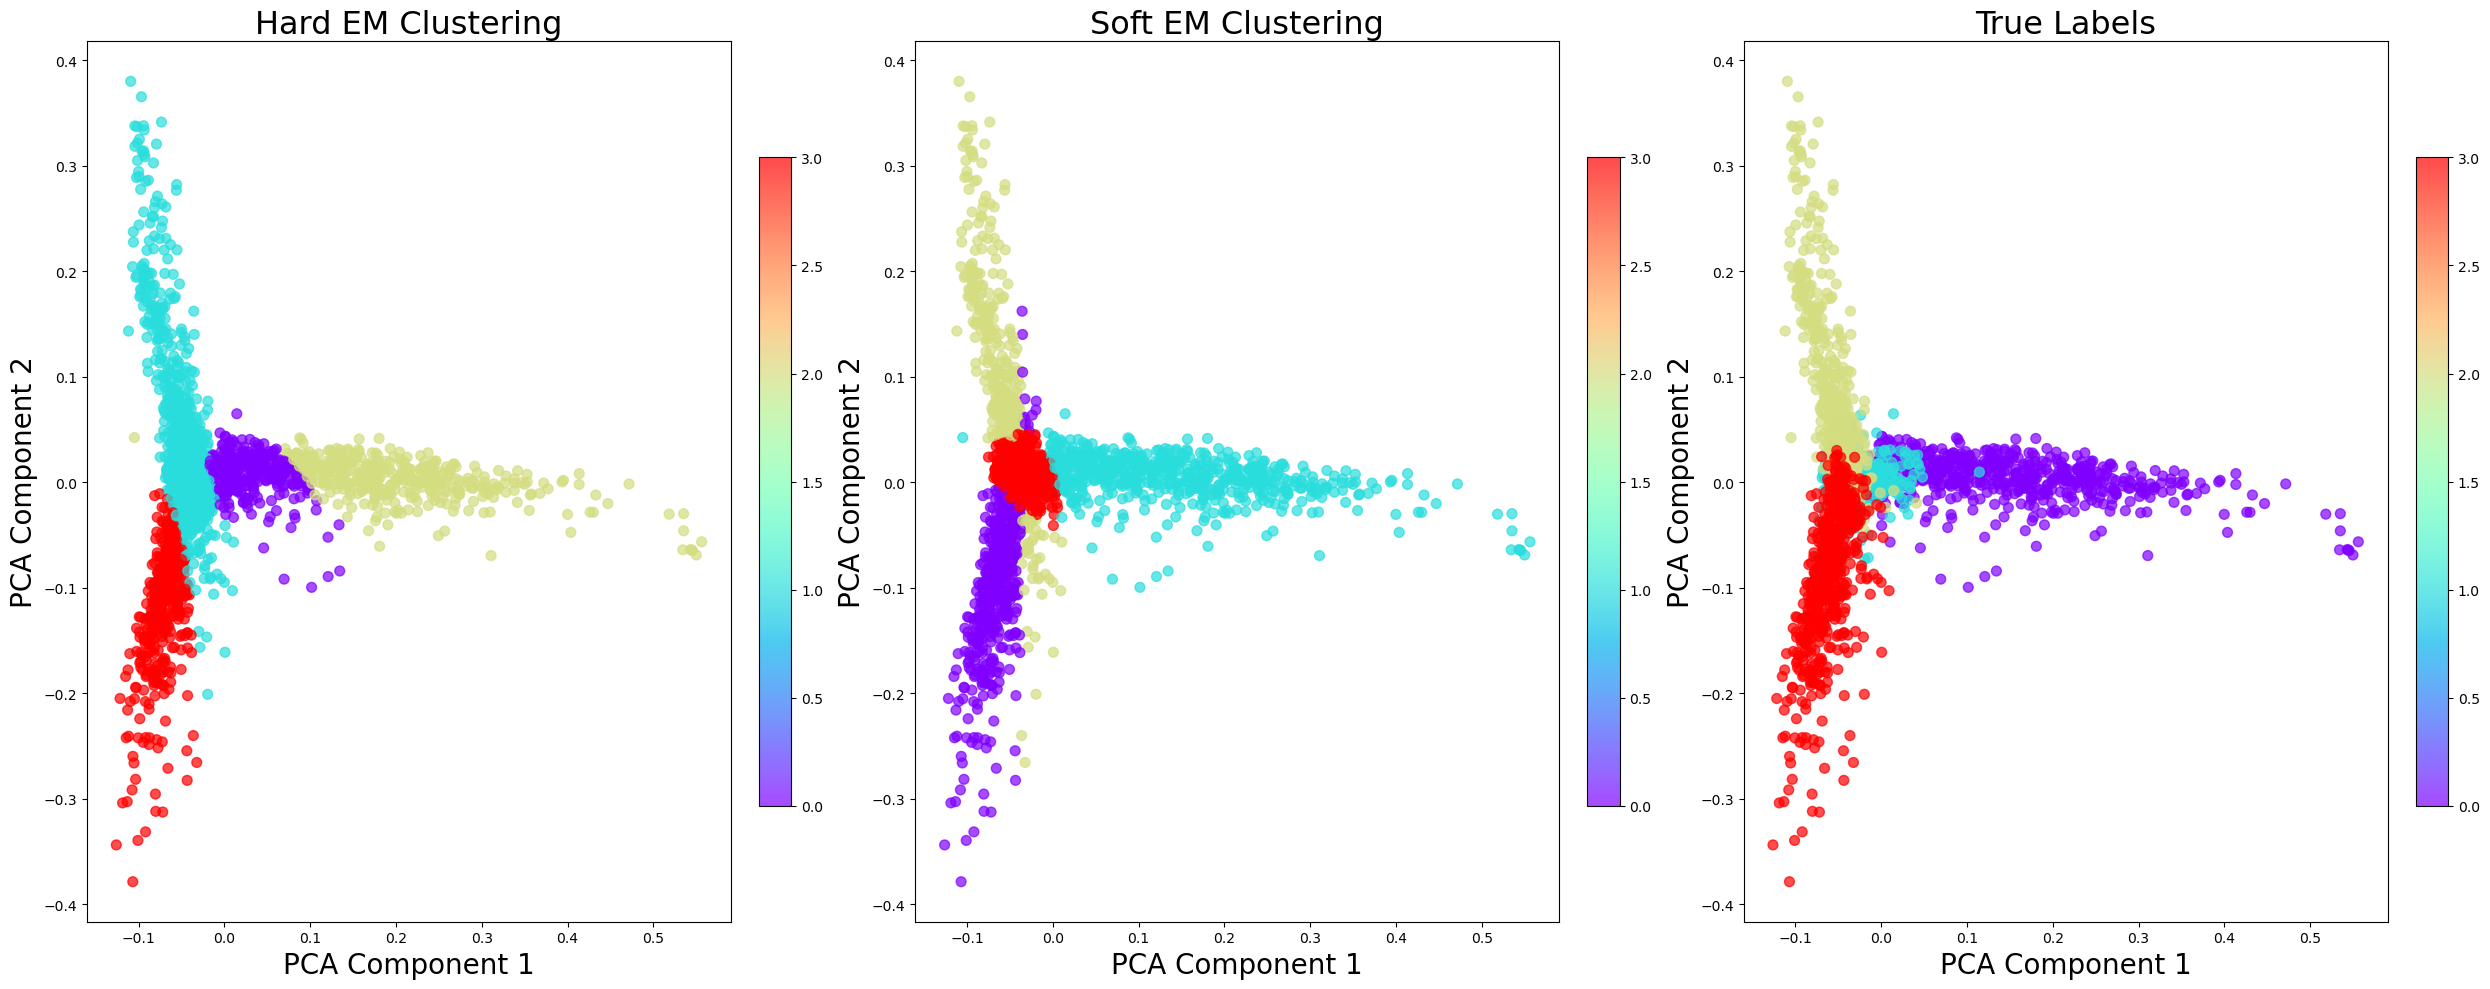

Hard Clustering Assignments: [2 2 2 ... 3 3 3]
Soft Clustering Assignments (Most Likely): [1 1 1 ... 0 0 0]
Soft Clustering Probabilities:
 [[1.26685091e-102 1.00000000e+000 2.09833094e-109 1.04559764e-071]
 [4.38705928e-101 1.00000000e+000 3.64942008e-107 3.62263783e-070]
 [4.38470278e-099 1.00000000e+000 2.83769286e-106 1.45005571e-069]
 ...
 [9.99999986e-001 1.46903719e-027 1.38765155e-008 4.53525268e-041]
 [9.65382558e-001 3.48802363e-010 3.46174420e-002 3.04840166e-012]
 [9.83551138e-001 9.45363312e-007 1.64478135e-002 1.03169994e-007]]


In [27]:
# Convert document data to TF-IDF format
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', min_df=5, norm='l2')
features = tfidf.fit_transform(docs.article.values)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

# Encode labels
label_encoder = LabelEncoder()
True_label = label_encoder.fit_transform(labels)

# Predict clusters
hard_predictions = hard_em.predict(_2D_features)
soft_predictions = soft_em.predict(_2D_features)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

def scatter_plot(ax, x, y, c, title, alpha=0.7):
    scatter = ax.scatter(x, y, c=c, cmap='rainbow', alpha=alpha, s=50)
    ax.set_title(title, fontsize=23)
    ax.set_xlabel('PCA Component 1', fontsize=20)
    ax.set_ylabel('PCA Component 2', fontsize=20)
    return scatter

# Hard EM results
scatter_hard = scatter_plot(axs[0], _2D_features[:, 0], _2D_features[:, 1], hard_predictions, 'Hard EM Clustering')
fig.colorbar(scatter_hard, ax=axs[0], fraction=0.046, pad=0.04)

# Soft EM results
scatter_soft = scatter_plot(axs[1], _2D_features[:, 0], _2D_features[:, 1], soft_predictions, 'Soft EM Clustering')
fig.colorbar(scatter_soft, ax=axs[1], fraction=0.046, pad=0.04)

# True labels
scatter_true = scatter_plot(axs[2], _2D_features[:, 0], _2D_features[:, 1], True_label, 'True Labels')
fig.colorbar(scatter_true, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Display clustering results
print("Hard Clustering Assignments:", hard_predictions)
print("Soft Clustering Assignments (Most Likely):", soft_predictions)
print("Soft Clustering Probabilities:\n", soft_em.predict_proba(_2D_features))
